In [ ]:
# Experiment 2: Data Profiling, Cleaning & Feature Engineering

# Step 1: Import Libraries
import pandas as pd
import pandas_profiling
import janitor
from great_expectations.dataset import PandasDataset
import os
import subprocess

# Step 2: Load Dataset
df = pd.read_csv("Haldiram's_dataset.csv")

# Step 3: Data Profiling Report
profile = df.profile_report(title="Haldirams Data Profiling Report")
profile.to_file("profiling_report.html")

# Step 4: Cleaning Missing Values & Duplicates
# Fill missing 'Rating' with mean
if 'Rating' in df.columns:
    df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

# Fill missing 'Price' with median
if 'Price' in df.columns:
    df['Price'] = df['Price'].fillna(df['Price'].median())

# Drop duplicates
df = df.drop_duplicates()

# Step 5: Feature Engineering - Example: Price Category
if 'Price' in df.columns:
    df['Price_Category'] = pd.cut(
        df['Price'],
        bins=[0, 100, 300, 1000],
        labels=['Low', 'Medium', 'High']
    )

# Step 6: Schema Validation with Great Expectations
class MyDataFrame(PandasDataset):
    pass

ge_df = MyDataFrame(df)

# Expect 'Price' to be positive
if 'Price' in df.columns:
    ge_df.expect_column_values_to_be_between('Price', min_value=0)

# Expect 'Rating' to be between 0 and 5
if 'Rating' in df.columns:
    ge_df.expect_column_values_to_be_between('Rating', min_value=0, max_value=5)

# Save validation results
validation_results = ge_df.validate()
print(validation_results)

# Step 7: Save Cleaned Dataset
cleaned_file_path = "Haldirams_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

# Step 8: Version Control with DVC
# (Assumes DVC is installed and initialized in your project)
if not os.path.exists(".dvc"):
    subprocess.run(["dvc", "init"])
subprocess.run(["dvc", "add", cleaned_file_path])

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
# Step 2: Load Dataset
df = pd.read_csv("Haldiram's_dataset.csv")

# List of columns to drop
columns_to_drop = ['product_link', 'product_image', 'product_page', 'rating_overall', 'customer_review', 'price','product_description']

# Drop the specified columns
df.drop(columns_to_drop, axis=1, inplace=True)

df.head()

,product_id,product_name,category,rating,sales,price_whole,per_count_price,mrp,discount,review_text,number_of_global_ratings,number_of_reviews,product_weight
0,1,Haldiram’s Gulab Jamun & Rasgulla Combo Pack 1...,Rose and Cardamom,4.1,100+ bought in past month,450,₹20,M.R.P: ₹450,(0% off),I loved the product. It's soft and yummy. Hald...,6489,4267,750g
1,2,"Haldiram's Delhi Nut Cracker, 400g",Spicy,4.2,50+ bought in past month,108,₹27,M.R.P: ₹110,(2% off),Good tasteRead more,7057,3617,500g
2,3,Haldiram's Nagpur Soan Cake 400gm (Pack of 2),sweet,4.0,Less than 50 bought in past month,300,₹37.50,M.R.P: ₹300,(0% off),Nice and fluffyRead more,1261,3697,1kg
3,4,Haldiram?s Dodha Burfi 400g x 2 | Fresh Indian...,Sweet,0.0,Less than 50 bought in past month,710,₹88.75,"M.R.P: ₹1,118",(36% off),Review text not found on page,2349,709,750g
4,5,Haldiram's Nagpur Haldiram's Fancy Dry Fruits ...,sweet,4.1,Less than 50 bought in past month,344,₹425,₹425,(19% off),Review text not found on page,7355,3884,500g


In [ ]:
# Drop rows with any null values
df.dropna(inplace=True)

# You can also reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print(df.head())

print("Total records", len(df))


   product_id                                       product_name  \
0           1  Haldiram’s Gulab Jamun & Rasgulla Combo Pack 1...   
1           2                 Haldiram's Delhi Nut Cracker, 400g   
2           3      Haldiram's Nagpur Soan Cake 400gm (Pack of 2)   
3           4  Haldiram?s Dodha Burfi 400g x 2 | Fresh Indian...   
4           5  Haldiram's Nagpur Haldiram's Fancy Dry Fruits ...   

            category  rating                              sales price_whole  \
0  Rose and Cardamom     4.1          100+ bought in past month         450   
1              Spicy     4.2           50+ bought in past month         108   
2              sweet     4.0  Less than 50 bought in past month         300   
3              Sweet     0.0  Less than 50 bought in past month         710   
4              sweet     4.1  Less than 50 bought in past month         344   

  per_count_price            mrp   discount  \
0             ₹20    M.R.P: ₹450   (0% off)   
1             ₹27    M

In [ ]:
# List of columns to drop
columns_to_drop = ['product_id']

# Drop the specified columns
df.drop(columns_to_drop, axis=1, inplace=True)

df = df.drop_duplicates()
print("Total records", len(df))

# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)

Total records 354


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

DATA_PATH = "HaldiramCleanedDataset.csv"
df = pd.read_csv(DATA_PATH)
n_rows, n_cols = df.shape
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Shape:", df.shape)
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)
df.head()

Shape: (1186, 15)
Numeric columns: ['product_id', 'rating', 'price_whole', 'mrp', 'number_of_global_ratings', 'number_of_reviews', 'discount_percent', 'is_discounted']
Categorical columns: ['product_name', 'category', 'sales', 'per_count_price', 'discount', 'review_text', 'product_weight']


,product_id,product_name,category,rating,sales,price_whole,per_count_price,mrp,discount,review_text,number_of_global_ratings,number_of_reviews,product_weight,discount_percent,is_discounted
0,1,Haldiram’s Gulab Jamun & Rasgulla Combo Pack 1...,Rose and Cardamom,4.1,100+ bought in past month,450,20,450,(0% off),I loved the product. It's soft and yummy. Hald...,6489,4267,750g,0.00,0
1,2,"Haldiram's Delhi Nut Cracker, 400g",Spicy,4.2,50+ bought in past month,108,27,110,(2% off),Good tasteRead more,7057,3617,500g,1.82,1
2,3,Haldiram's Nagpur Soan Cake 400gm (Pack of 2),sweet,4.0,Less than 50 bought in past month,300,37.5,300,(0% off),Nice and fluffyRead more,1261,3697,1kg,0.00,0
3,4,Haldiram?s Dodha Burfi 400g x 2 | Fresh Indian...,Sweet,0.0,Less than 50 bought in past month,710,88.75,1118,(36% off),Loved the taste and freshness,2349,709,750g,36.49,1
4,5,Haldiram's Nagpur Haldiram's Fancy Dry Fruits ...,sweet,4.1,Less than 50 bought in past month,344,425,425,(19% off),Loved the taste and freshness,7355,3884,500g,19.06,1


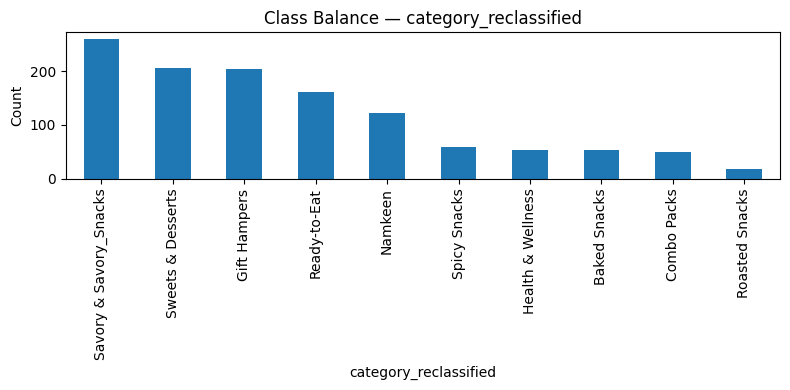

category_reclassified
Savory & Savory_Snacks    259
Sweets & Desserts         206
Gift Hampers              203
Ready-to-Eat              161
Namkeen                   123
Spicy Snacks               59
Health & Wellness          54
Baked Snacks               53
Combo Packs                50
Roasted Snacks             18
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Haldirams_cleaned.csv")

# Count categories
counts = df["category_reclassified"].value_counts(dropna=False)

# Plot bar chart
plt.figure(figsize=(8,4))
counts.plot(kind='bar')
plt.title("Class Balance — category_reclassified")
plt.xlabel("category_reclassified")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Show counts
print(counts)

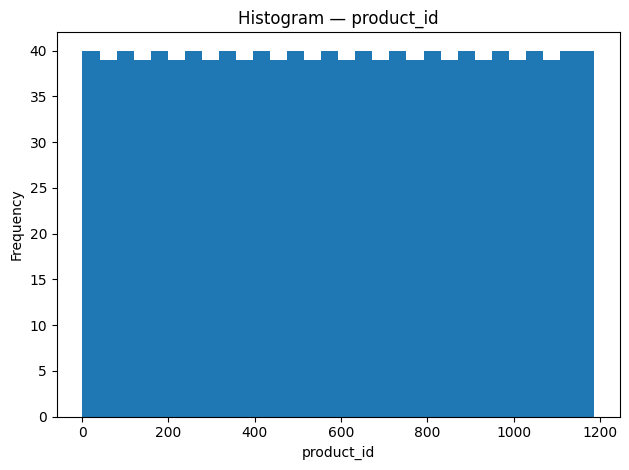

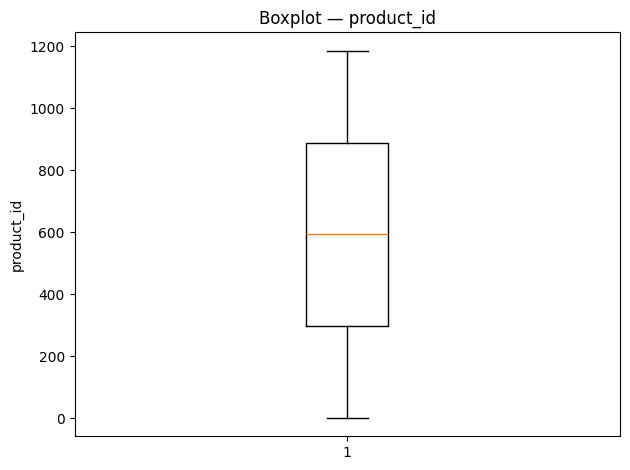

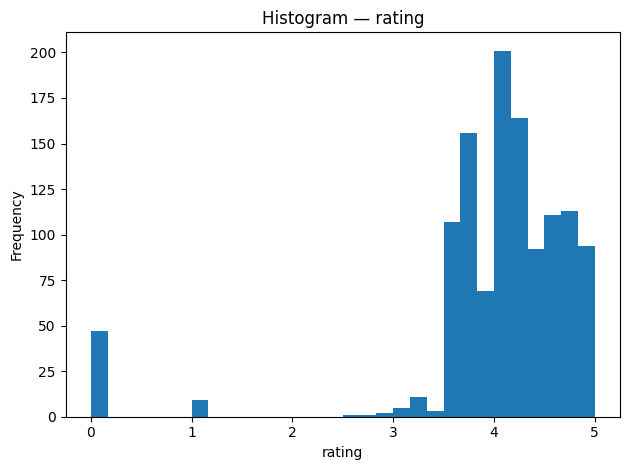

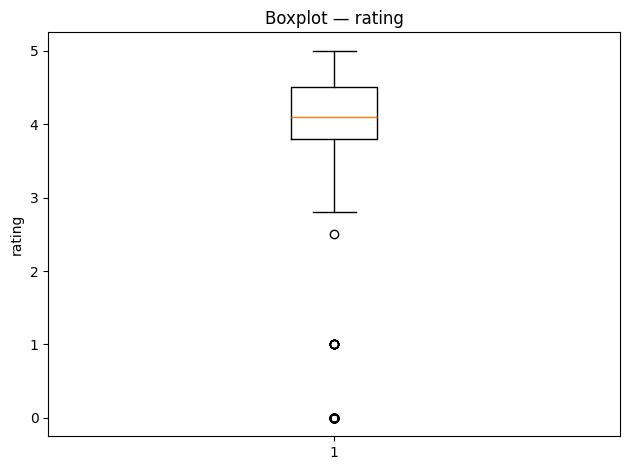

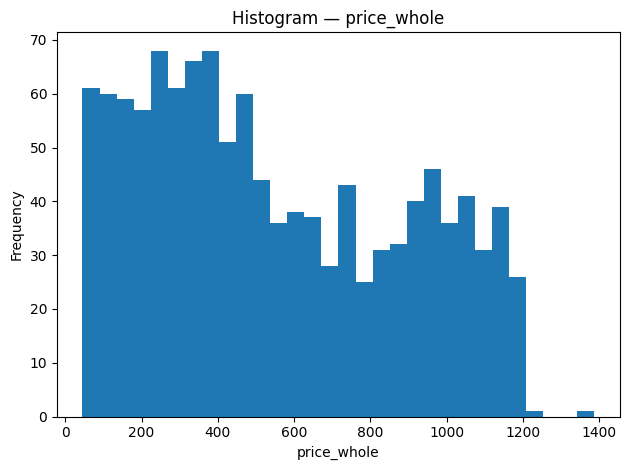

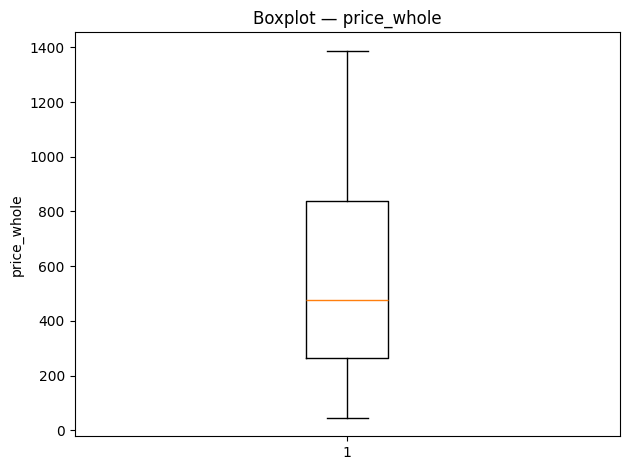

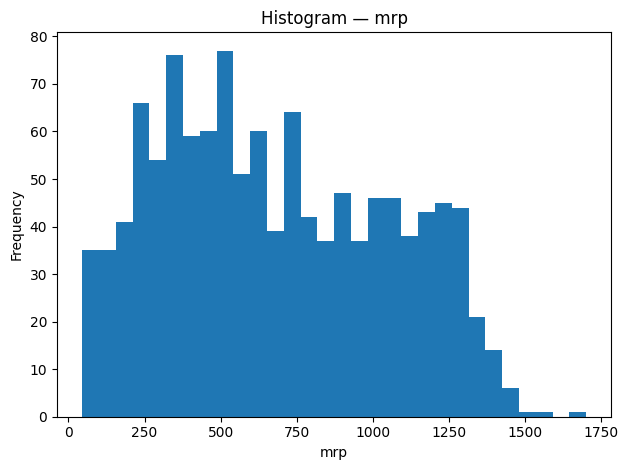

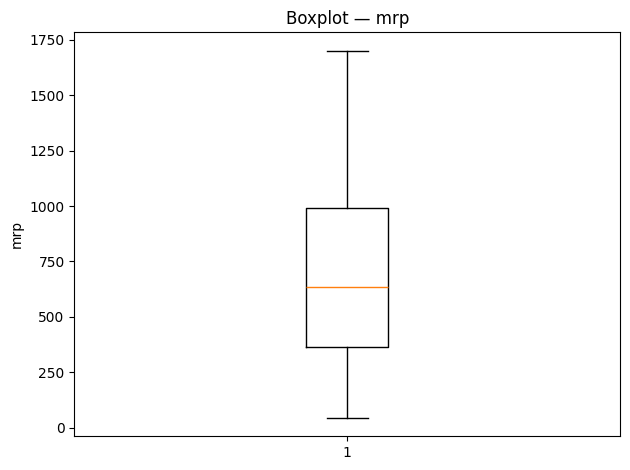

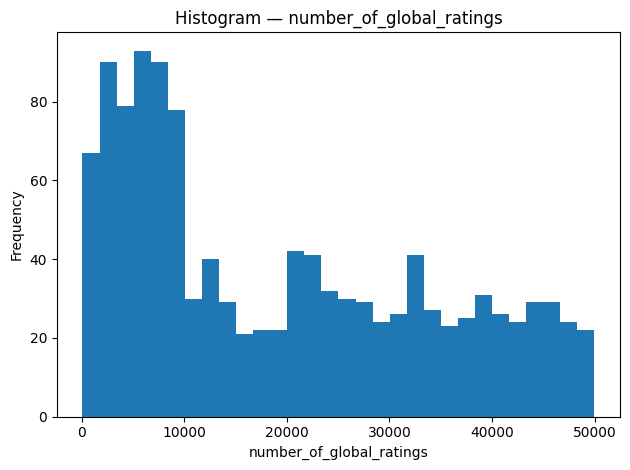

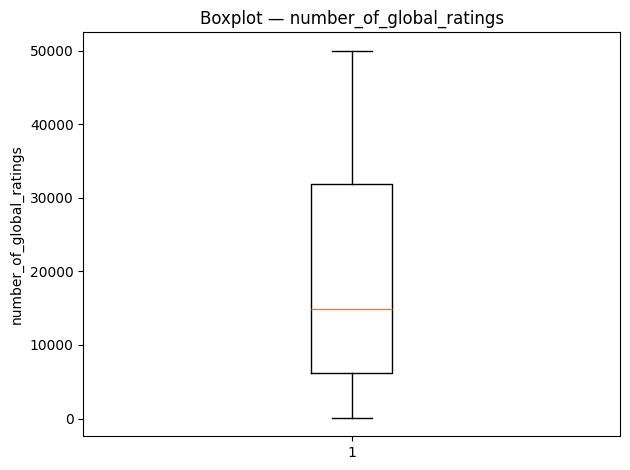

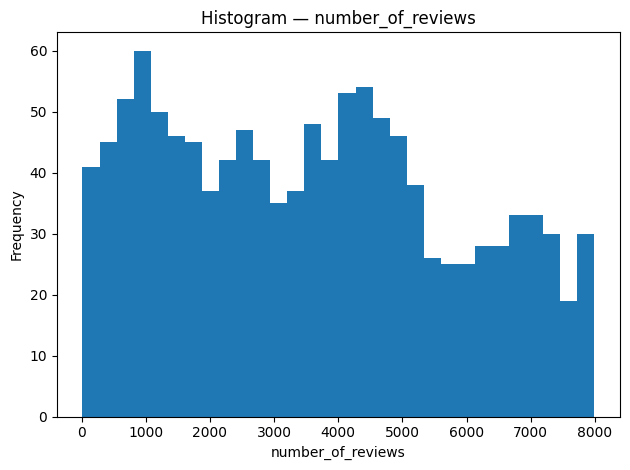

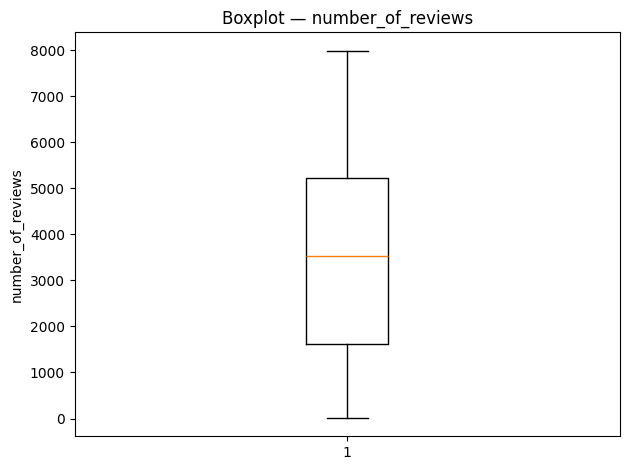

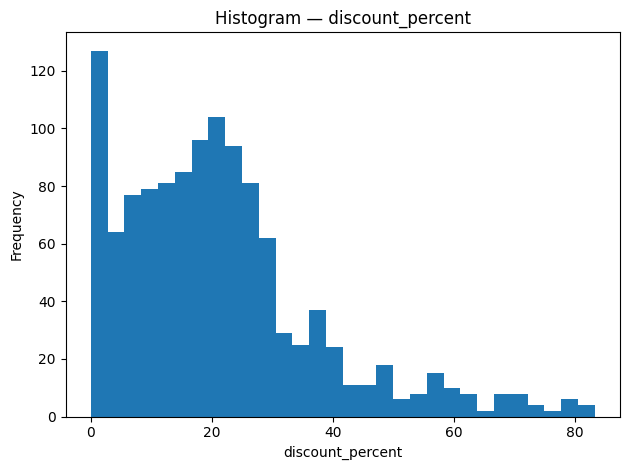

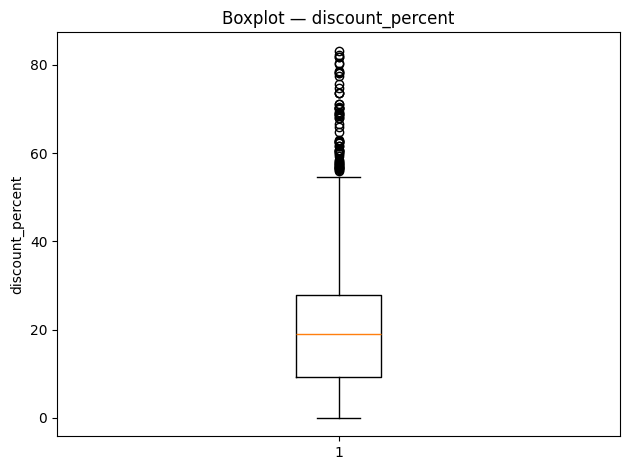

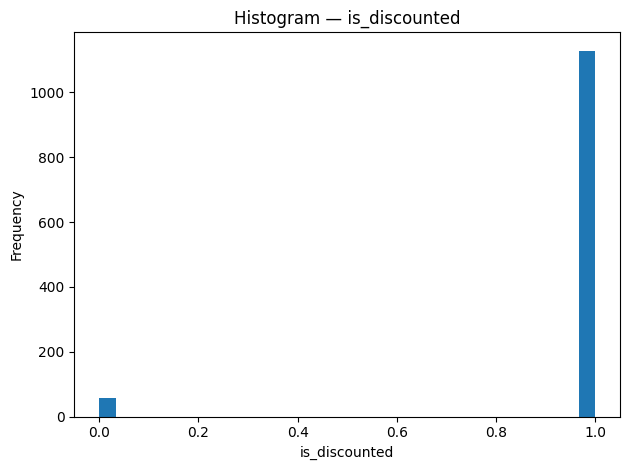

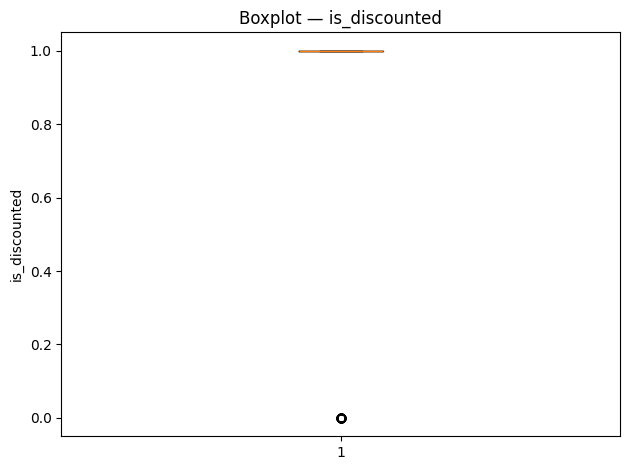

In [ ]:
plot_numeric_cols = ['product_id', 'rating', 'price_whole', 'mrp', 'number_of_global_ratings', 'number_of_reviews', 'discount_percent', 'is_discounted']
for col in plot_numeric_cols:
    fig = plt.figure()
    df[col].dropna().plot(kind='hist', bins=30)
    plt.title(f"Histogram — {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    fig = plt.figure()
    plt.boxplot(df[col].dropna().values, vert=True)
    plt.title(f"Boxplot — {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

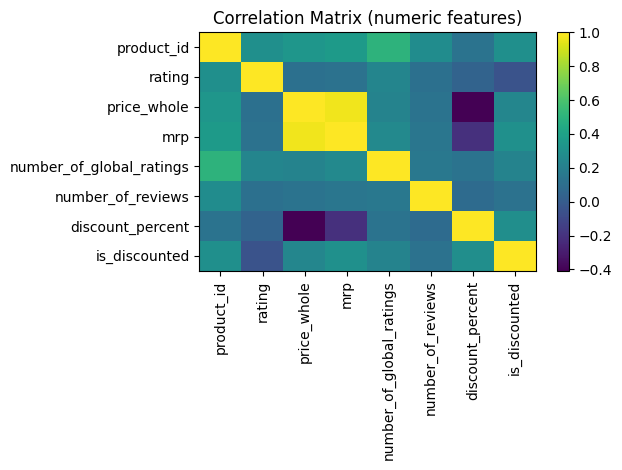

,product_id,rating,price_whole,mrp,number_of_global_ratings,number_of_reviews,discount_percent,is_discounted
product_id,1.000000,0.294545,0.330200,0.362490,0.504848,0.275327,0.127762,0.292251
rating,0.294545,1.000000,0.111974,0.120946,0.235876,0.113711,0.039812,-0.044236
price_whole,0.330200,0.111974,1.000000,0.970044,0.221144,0.126463,-0.406842,0.238785
mrp,0.362490,0.120946,0.970044,1.000000,0.254093,0.143020,-0.210216,0.297356
number_of_global_ratings,0.504848,0.235876,0.221144,0.254093,1.000000,0.156362,0.130127,0.220481
number_of_reviews,0.275327,0.113711,0.126463,0.143020,0.156362,1.000000,0.083632,0.125020
discount_percent,0.127762,0.039812,-0.406842,-0.210216,0.130127,0.083632,1.000000,0.289873
is_discounted,0.292251,-0.044236,0.238785,0.297356,0.220481,0.125020,0.289873,1.000000


In [ ]:
corr = df[['product_id', 'rating', 'price_whole', 'mrp', 'number_of_global_ratings', 'number_of_reviews', 'discount_percent', 'is_discounted']].corr(numeric_only=True)
fig = plt.figure()
im = plt.imshow(corr.values, aspect='auto')
plt.colorbar(im)
plt.xticks(range(len(['product_id', 'rating', 'price_whole', 'mrp', 'number_of_global_ratings', 'number_of_reviews', 'discount_percent', 'is_discounted'])), ['product_id', 'rating', 'price_whole', 'mrp', 'number_of_global_ratings', 'number_of_reviews', 'discount_percent', 'is_discounted'], rotation=90)
plt.yticks(range(len(['product_id', 'rating', 'price_whole', 'mrp', 'number_of_global_ratings', 'number_of_reviews', 'discount_percent', 'is_discounted'])), ['product_id', 'rating', 'price_whole', 'mrp', 'number_of_global_ratings', 'number_of_reviews', 'discount_percent', 'is_discounted'])
plt.title("Correlation Matrix (numeric features)")
plt.tight_layout()
plt.show()
corr

In [ ]:
from scipy import stats
g1 = df[df["product_weight"] == "200g"]["product_id"].dropna()
g2 = df[df["product_weight"] == "750g"]["product_id"].dropna()
t_stat, p_val = stats.ttest_ind(g1, g2, equal_var=False)
print("Metric:", "product_id")
print("Groups:", "200g", "vs", "750g")
print("n:", len(g1), "vs", len(g2))
print("means:", g1.mean(), "vs", g2.mean())
print("Welch t-statistic:", t_stat)
print("p-value:", p_val)

Metric: product_id
Groups: 200g vs 750g
n: 148 vs 135
means: 388.7094594594595 vs 380.05925925925925
Welch t-statistic: 0.22411863280635622
p-value: 0.822827990075552


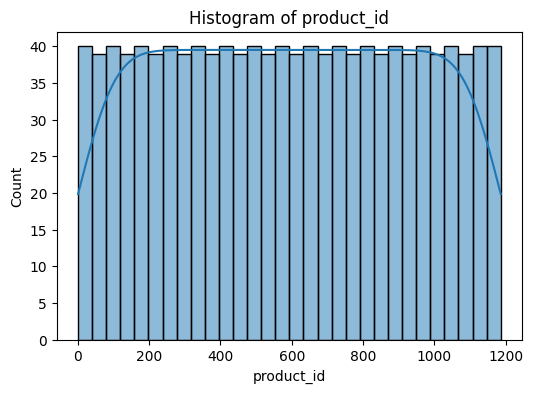

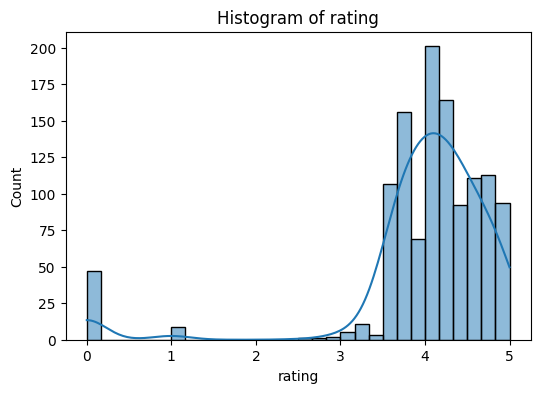

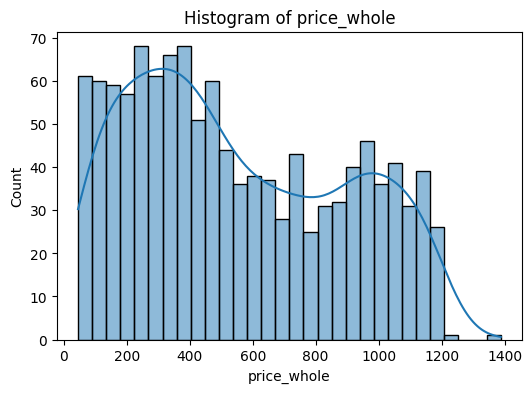

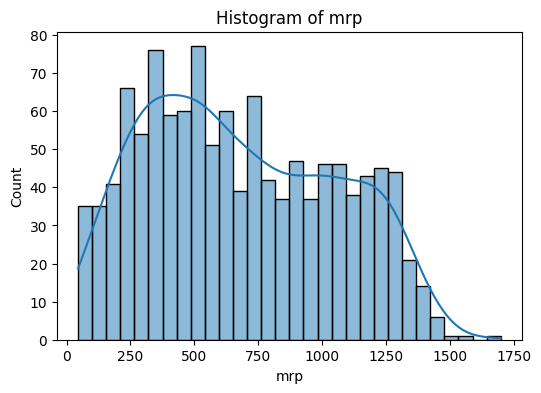

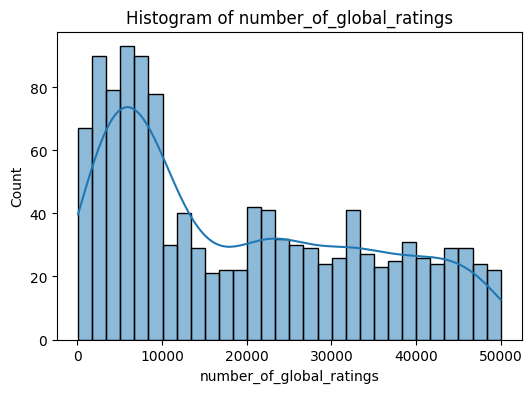

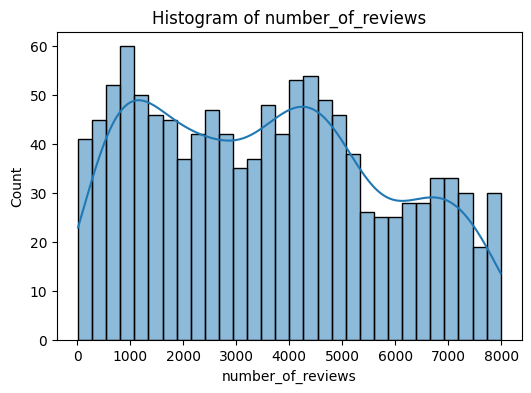

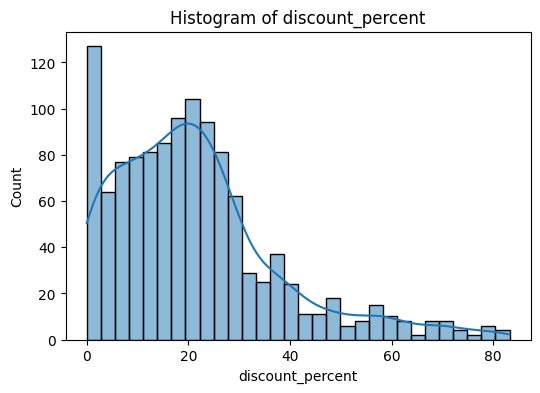

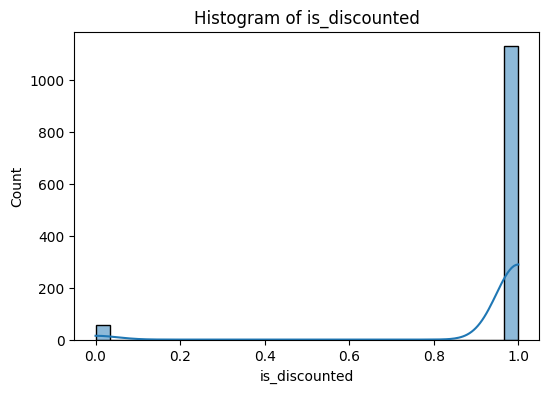

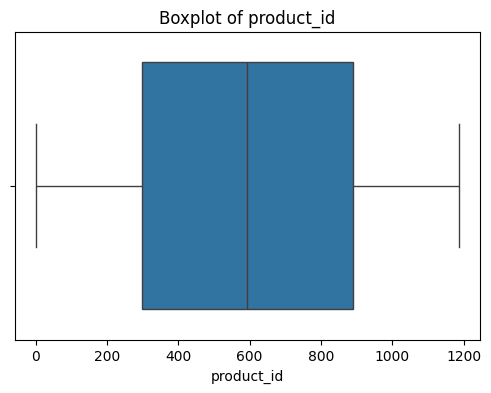

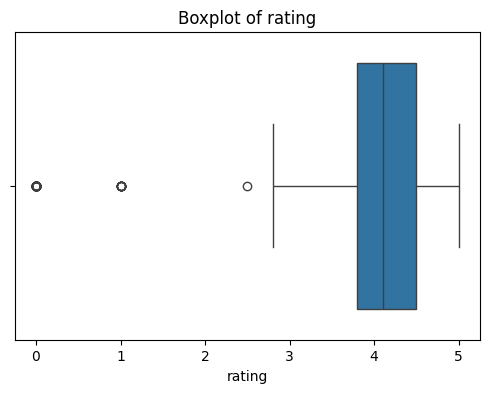

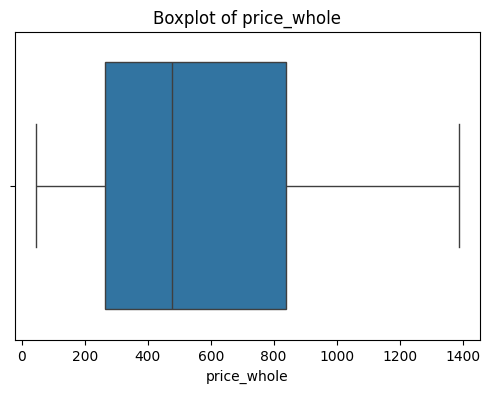

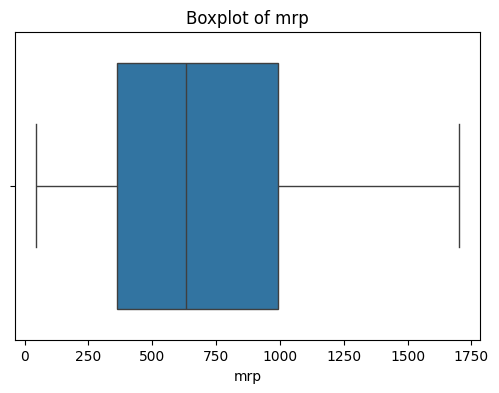

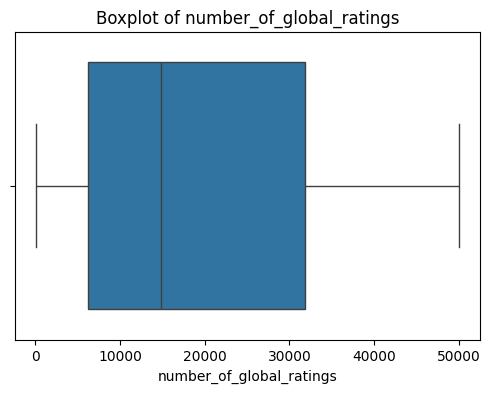

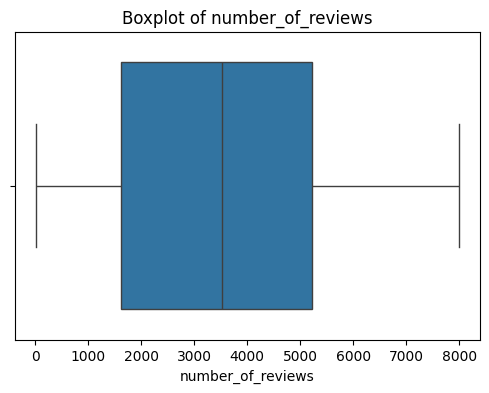

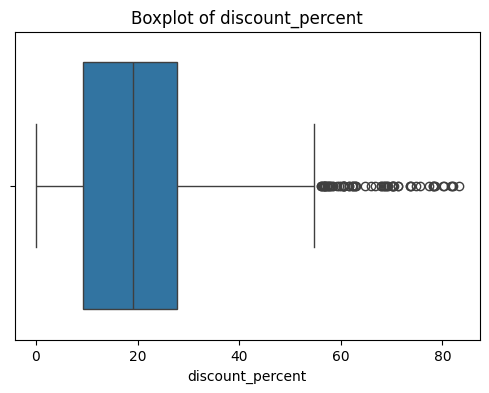

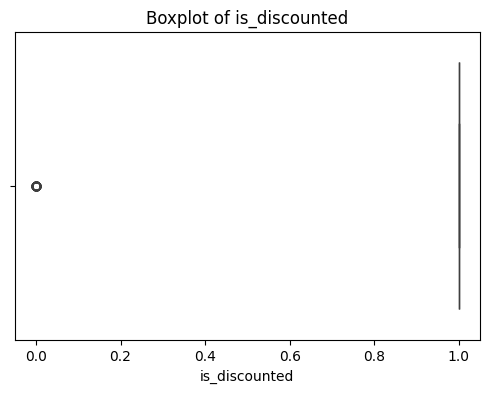

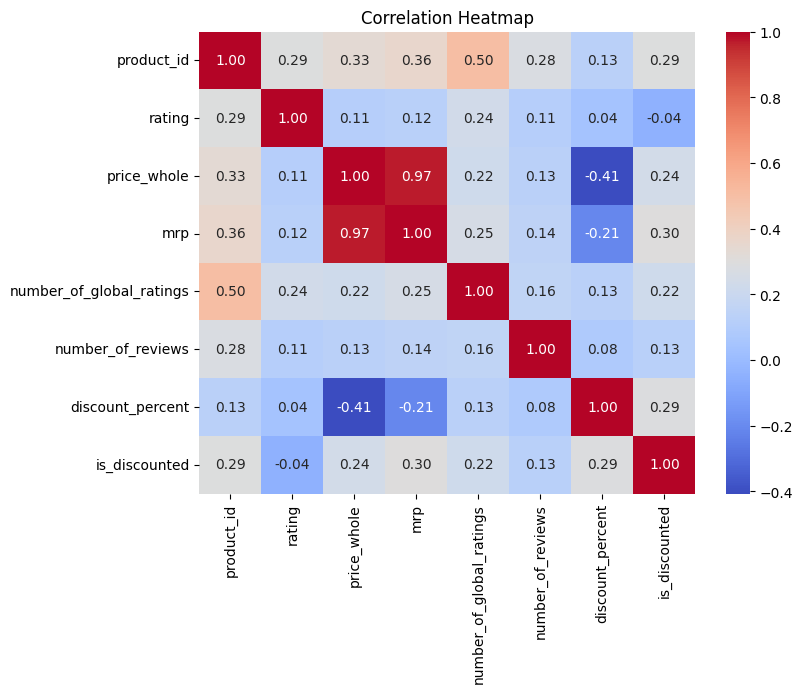

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load dataset
df = pd.read_csv("HaldiramCleanedDataset.csv")

# ===============================
# 1. Class Balance (if categorical target exists)
# ===============================
# Try to detect a label-like column (categorical with low unique values)
categorical_cols = df.select_dtypes(include=['object']).columns
label_col = None
for col in categorical_cols:
    if df[col].nunique() < 15:  # heuristic
        label_col = col
        break

if label_col:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=label_col)
    plt.title(f"Class Balance: {label_col}")
    plt.xticks(rotation=45)
    plt.show()

# ===============================
# 2. Histograms
# ===============================
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.show()

# ===============================
# 3. Boxplots
# ===============================
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# ===============================
# 4. Correlation Heatmap
# ===============================
plt.figure(figsize=(8,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# ===============================
# 5. Hypothesis Testing (Welch’s t-test)
# ===============================
if label_col and len(df[label_col].unique()) >= 2:
    # Pick top 2 classes
    top_classes = df[label_col].value_counts().index[:2]
    group1 = df[df[label_col] == top_classes[0]][num_cols[0]].dropna()
    group2 = df[df[label_col] == top_classes[1]][num_cols[0]].dropna()

    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)

    print(f"\nWelch’s t-test on {num_cols[0]} between {top_classes[0]} and {top_classes[1]}:")
    print(f"t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
    if p_val < 0.05:
        print("Reject Null Hypothesis → Significant difference.")
    else:
        print("Fail to Reject Null Hypothesis → No significant difference.")


**NEW CODE**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

DATA_PATH = "Haldirams_cleaned.csv"
df = pd.read_csv(DATA_PATH)

In [ ]:
df_new = df.drop(columns=['category', 'category_grouped'])
# Assuming 'df_new' is your DataFrame after dropping columns
df_new.to_csv('Haldirams_recla.csv', index=False)

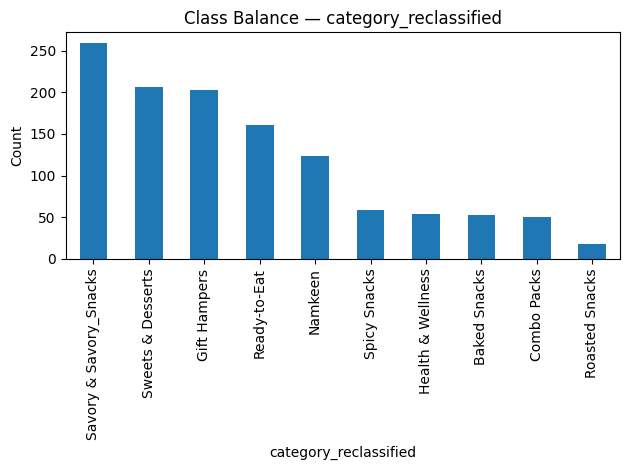

,count
category_reclassified,
Savory & Savory_Snacks,259
Sweets & Desserts,206
Gift Hampers,203
Ready-to-Eat,161
Namkeen,123
Spicy Snacks,59
Health & Wellness,54
Baked Snacks,53
Combo Packs,50


In [ ]:
counts = df["category_reclassified"].value_counts(dropna=False)
fig = plt.figure()
counts.plot(kind='bar')
plt.title("Class Balance — category_reclassified")
plt.xlabel("category_reclassified")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
counts

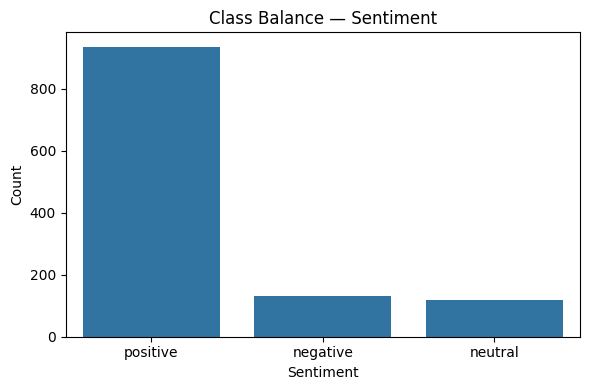

sentiment
positive    935
negative    131
neutral     120
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment counts
sent_counts = df["sentiment"].value_counts(dropna=False)

# Plot
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=df, order=sent_counts.index)
plt.title("Class Balance — Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print(sent_counts)

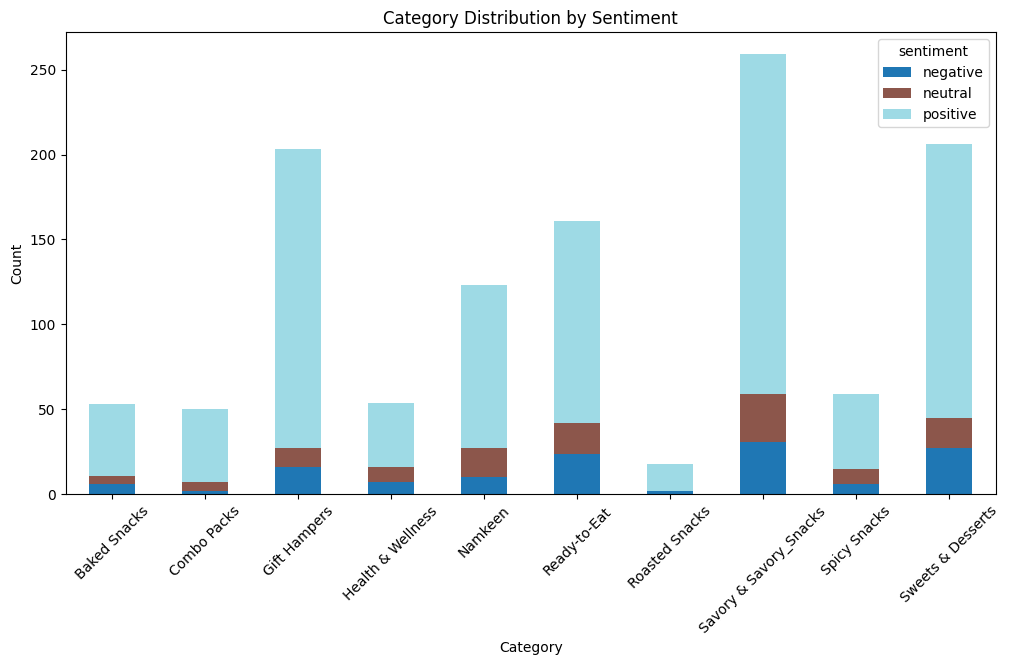

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crosstab of sentiment vs category
cat_sent = pd.crosstab(df['category_reclassified'], df['sentiment'])

# Stacked bar plot
cat_sent.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Category Distribution by Sentiment")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

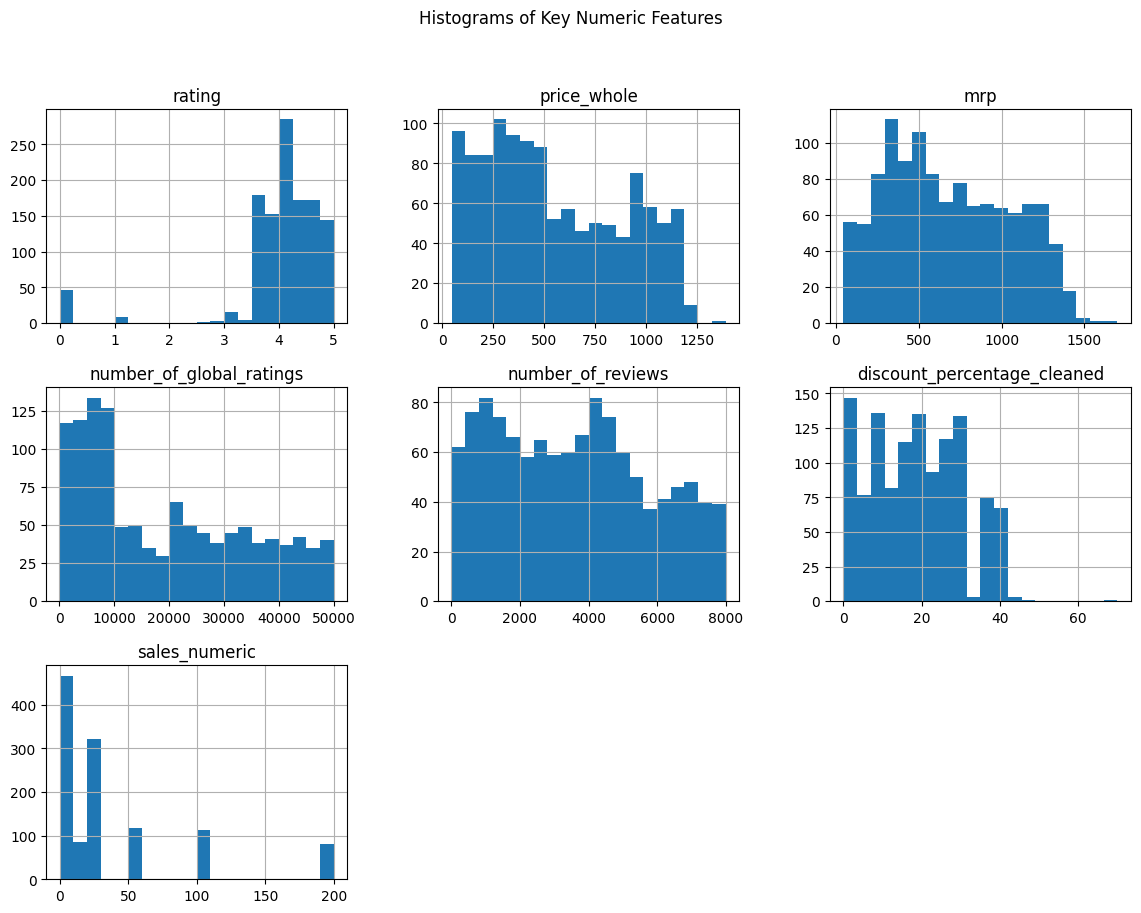

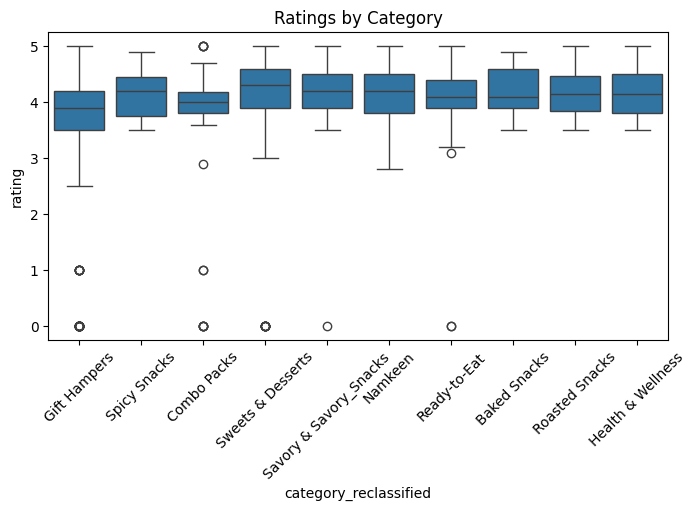

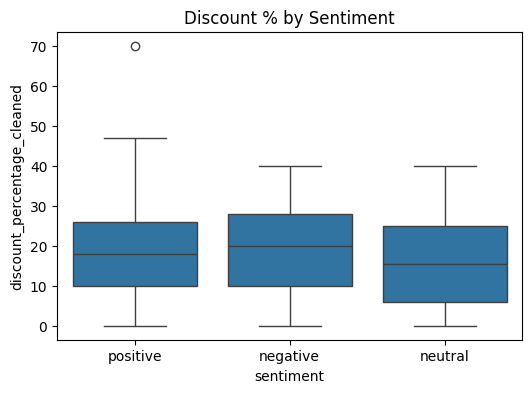

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pick relevant numeric columns for your goal
numeric_cols = [
    'rating', 'price_whole', 'mrp',
    'number_of_global_ratings', 'number_of_reviews',
    'discount_percentage_cleaned', 'sales_numeric'
]

# -------------------------------
# Histograms (all numeric features)
# -------------------------------
if numeric_cols:
    df[numeric_cols].hist(
        bins=20, figsize=(14,10),
        layout=(len(numeric_cols)//3 + 1, 3)
    )
    plt.suptitle("Histograms of Key Numeric Features")
    plt.show()

# -------------------------------
# Boxplot 1: Ratings by Category
# -------------------------------
plt.figure(figsize=(8,4))
sns.boxplot(x='category_reclassified', y='rating', data=df)
plt.title("Ratings by Category")
plt.xticks(rotation=45)
plt.show()

# -------------------------------
# Boxplot 2: Discounts by Sentiment
# -------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x='sentiment', y='discount_percentage_cleaned', data=df)
plt.title("Discount % by Sentiment")
plt.show()

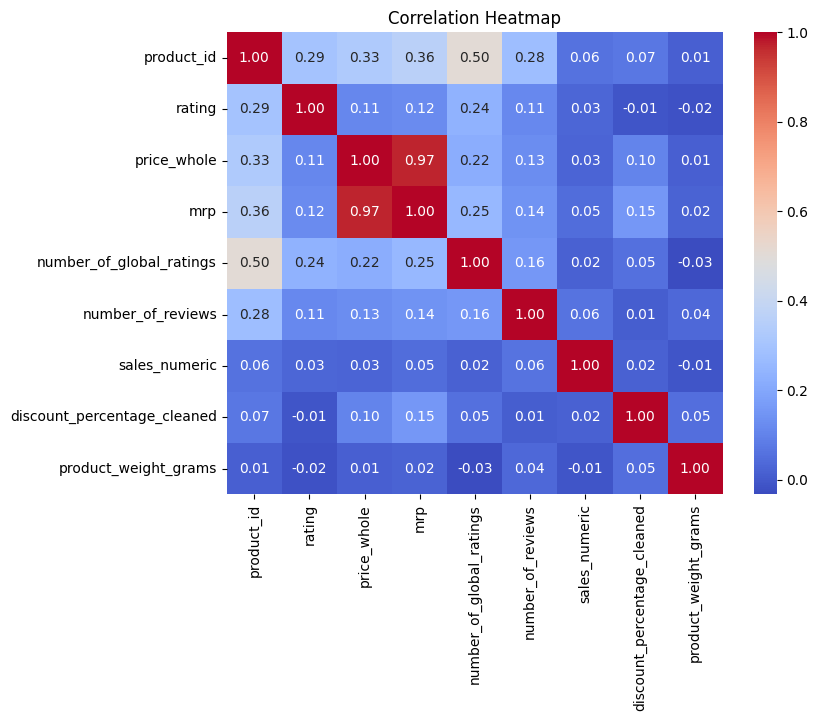

In [ ]:
# ===============================
# 4. Correlation Heatmap
# ===============================
plt.figure(figsize=(8,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

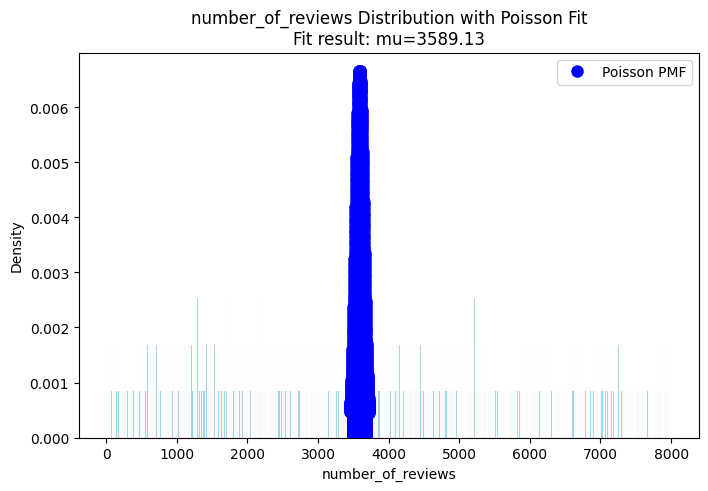

In [ ]:
#Feature Distribution Analysis & Outlier Detection

from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Replace 'number_of_reviews' with any count feature you want
feature = 'number_of_reviews'

plt.figure(figsize=(8, 5))

# Histogram with bins centered on integers
sns.histplot(df[feature].dropna(),
             bins=np.arange(df[feature].min(), df[feature].max() + 2) - 0.5,
             stat="density",
             color='skyblue')

# Fit Poisson
mu_poisson = df[feature].dropna().mean()

# Generate x values for PMF plot
x = np.arange(poisson.ppf(0.01, mu_poisson), poisson.ppf(0.99, mu_poisson) + 1)

# Plot Poisson PMF
plt.plot(x, poisson.pmf(x, mu_poisson), 'bo', ms=8, label='Poisson PMF')
plt.vlines(x, 0, poisson.pmf(x, mu_poisson), colors='b', lw=5, alpha=0.5)

plt.title(f"{feature} Distribution with Poisson Fit\nFit result: mu={mu_poisson:.2f}")
plt.legend()
plt.show()

In [ ]:
from scipy import stats
import pandas as pd

# Load your dataset (if not already loaded)
# df = pd.read_csv('haldiram_dataset.csv')

# Convert relevant columns to numeric
df['price_whole'] = pd.to_numeric(df['price_whole'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['number_of_reviews'] = pd.to_numeric(df['number_of_reviews'], errors='coerce')
df['discount_percentage_cleaned'] = pd.to_numeric(df['discount_percentage_cleaned'], errors='coerce')

print("T-TEST RESULTS FOR HALDIRAM ONLINE ANALYSIS\n")

# 1. Price by Category (Gift Hampers vs Namkeen)
gift = df[df['category_reclassified'] == 'Gift Hampers']['price_whole'].dropna()
namkeen = df[df['category_reclassified'] == 'Namkeen']['price_whole'].dropna()

t_stat, p_val = stats.ttest_ind(gift, namkeen)
print("1. PRICE BY CATEGORY (Gift Hampers vs Namkeen):")
print(f"Gift Hampers mean: {gift.mean():.2f}, Namkeen mean: {namkeen.mean():.2f}")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
print(f"Significant: {'Yes' if p_val < 0.05 else 'No'}\n")

# 2. Ratings by Category (Sweets & Desserts vs Spicy Snacks)
sweets = df[df['category_reclassified'] == 'Sweets & Desserts']['rating'].dropna()
spicy = df[df['category_reclassified'] == 'Spicy Snacks']['rating'].dropna()

t_stat, p_val = stats.ttest_ind(sweets, spicy)
print("2. RATINGS BY CATEGORY (Sweets & Desserts vs Spicy Snacks):")
print(f"Sweets & Desserts mean: {sweets.mean():.2f}, Spicy Snacks mean: {spicy.mean():.2f}")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
print(f"Significant: {'Yes' if p_val < 0.05 else 'No'}\n")

# 3. Price by Discount Level (High >= 20% vs Low < 20%)
high_discount = df[df['discount_percentage_cleaned'] >= 20]['price_whole'].dropna()
low_discount = df[df['discount_percentage_cleaned'] < 20]['price_whole'].dropna()

t_stat, p_val = stats.ttest_ind(high_discount, low_discount)
print("3. PRICE BY DISCOUNT LEVEL (High vs Low):")
print(f"High Discount mean: {high_discount.mean():.2f}, Low Discount mean: {low_discount.mean():.2f}")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
print(f"Significant: {'Yes' if p_val < 0.05 else 'No'}\n")

# 4. One-sample t-test: Is average price different from 200 Rs?
all_prices = df['price_whole'].dropna()
t_stat, p_val = stats.ttest_1samp(all_prices, 200)
print("4. ONE-SAMPLE TEST (Price vs 200 Rs):")
print(f"Sample mean: {all_prices.mean():.2f}, Test value: 200")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
print(f"Significant: {'Yes' if p_val < 0.05 else 'No'}\n")

# 5. Paired t-test: First 10 vs Last 10 Ratings
first_10 = df['rating'].head(10).dropna()
last_10 = df['rating'].tail(10).dropna()

if len(first_10) == len(last_10):
    t_stat, p_val = stats.ttest_rel(first_10, last_10)
    print("5. PAIRED TEST (First 10 vs Last 10 Ratings):")
    print(f"First 10 mean: {first_10.mean():.2f}, Last 10 mean: {last_10.mean():.2f}")
    print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
    print(f"Significant: {'Yes' if p_val < 0.05 else 'No'}\n")

T-TEST RESULTS FOR HALDIRAM ONLINE ANALYSIS

1. PRICE BY CATEGORY (Gift Hampers vs Namkeen):
Gift Hampers mean: 495.86, Namkeen mean: 524.52
t-statistic: -0.839, p-value: 0.402
Significant: No

2. RATINGS BY CATEGORY (Sweets & Desserts vs Spicy Snacks):
Sweets & Desserts mean: 4.08, Spicy Snacks mean: 4.18
t-statistic: -0.797, p-value: 0.426
Significant: No

3. PRICE BY DISCOUNT LEVEL (High vs Low):
High Discount mean: 563.07, Low Discount mean: 536.64
t-statistic: 1.350, p-value: 0.177
Significant: No

4. ONE-SAMPLE TEST (Price vs 200 Rs):
Sample mean: 549.05, Test value: 200
t-statistic: 35.723, p-value: 0.000
Significant: Yes

5. PAIRED TEST (First 10 vs Last 10 Ratings):
First 10 mean: 3.24, Last 10 mean: 4.27
t-statistic: -1.712, p-value: 0.121
Significant: No



In [ ]:
import pandas as pd
from scipy import stats

# Sample dataset (Assuming the dataset is already loaded into a DataFrame)
df = pd.read_csv("Haldirams_cleaned_dataset.csv")

# Filtering the dataset into two groups based on sentiment
positive_sentiment = df[df['sentiment'] == 'positive']
negative_sentiment = df[df['sentiment'] != 'positive']

# T-test for ratings by sentiment
rating_ttest = stats.ttest_ind(positive_sentiment['rating'], negative_sentiment['rating'], nan_policy='omit')
print(f"T-test result for Ratings by Sentiment: {rating_ttest}")

# T-test for price_whole by sentiment
price_ttest = stats.ttest_ind(positive_sentiment['price_whole'], negative_sentiment['price_whole'], nan_policy='omit')
print(f"T-test result for Price by Sentiment: {price_ttest}")


T-test result for Ratings by Sentiment: TtestResult(statistic=np.float64(-2.9922129765014605), pvalue=np.float64(0.002826996517608545), df=np.float64(1184.0))
T-test result for Price by Sentiment: TtestResult(statistic=np.float64(-1.72568871121439), pvalue=np.float64(0.08466433834900722), df=np.float64(1184.0))


In [ ]:
import pandas as pd
from scipy import stats

# STEP 1: Load your dataset
# Replace 'your_data.csv' with your actual file path
df = pd.read_csv('Haldirams_cleaned_dataset.csv')

# STEP 2: Clean the data (remove missing values in tested columns)
df_clean = df[['rating', 'price_whole', 'sentiment']].dropna()

# STEP 3: Create two groups based on sentiment
positive = df_clean[df_clean['sentiment'] == 'positive']
non_positive = df_clean[df_clean['sentiment'] != 'positive']

# ========== T-TEST FOR RATINGS ==========
t_stat_rating, p_val_rating = stats.ttest_ind(
    positive['rating'],
    non_positive['rating'],
    equal_var=False,      # Welch’s t-test (does not assume equal variance)
    nan_policy='omit'     # Skip NaNs
)

print("T-Test: Ratings by Sentiment")
print(f"  t-statistic = {t_stat_rating:.4f}")
print(f"  p-value     = {p_val_rating:.4f}")
if p_val_rating < 0.05:
    print("Result: Statistically significant (reject H₀)")
    print("Conclusion: Sentiment affects product ratings.\n")
else:
    print("Result: Not statistically significant (fail to reject H₀)")
    print("Conclusion: No evidence that sentiment affects ratings.\n")

# ========== T-TEST FOR PRICE ==========
t_stat_price, p_val_price = stats.ttest_ind(
    positive['price_whole'],
    non_positive['price_whole'],
    equal_var=False,
    nan_policy='omit'
)

print("T-Test: Price by Sentiment")
print(f"  t-statistic = {t_stat_price:.4f}")
print(f"  p-value     = {p_val_price:.4f}")
if p_val_price < 0.05:
    print("Result: Statistically significant (reject H₀)")
    print("Conclusion: Sentiment affects product pricing.\n")
else:
    print("Result: Not statistically significant (fail to reject H₀)")
    print("Conclusion: No evidence that sentiment affects pricing.\n")

T-Test: Ratings by Sentiment
  t-statistic = -4.0653
  p-value     = 0.0001
Result: Statistically significant (reject H₀)
Conclusion: Sentiment affects product ratings.

T-Test: Price by Sentiment
  t-statistic = -1.6932
  p-value     = 0.0912
Result: Not statistically significant (fail to reject H₀)
Conclusion: No evidence that sentiment affects pricing.



In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from scipy import stats

# STEP 1: Load your dataset
# Replace 'your_data.csv' with your actual file path
df = pd.read_csv('Haldirams_cleaned_dataset.csv')

numeric_cols = [
    'rating', 'price_whole', 'per_count_price', 'mrp',
    'number_of_global_ratings', 'number_of_reviews', 'sales_numeric',
    'discount_percentage_cleaned', 'product_weight_grams'
]

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN values in these numeric columns
data = data.dropna(subset=numeric_cols)

NameError: name 'data' is not defined

In [ ]:
# Clean per_count_price column
df['per_count_price'] = (
    df['per_count_price']
    .astype(str)          # ensure it's a string
    .str.replace(',', '') # remove commas
)

df['per_count_price'] = pd.to_numeric(df['per_count_price'], errors='coerce')

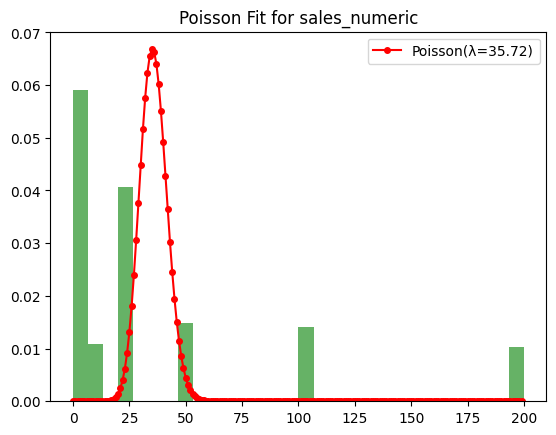

Chi-square Test: statistic=387028213955522513919970771567223854944005826789914425033469575606447667467517952.0000, p-value=0.0000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, chisquare

# Example: check if 'sales_numeric' follows a Poisson distribution
col = "sales_numeric"
data = df[col].dropna()

# Estimate Poisson parameter (lambda = mean of data)
lam = np.mean(data)

# Plot histogram
counts, bins, _ = plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Poisson PMF
x = np.arange(0, int(max(data)))
pmf = poisson.pmf(x, lam)

plt.plot(x, pmf, 'ro-', ms=4, label=f'Poisson(λ={lam:.2f})')
plt.title(f"Poisson Fit for {col}")
plt.legend()
plt.show()

# Chi-square test (observed vs expected frequencies)
# Bin the data into categories
obs_counts = np.bincount(data)
exp_counts = [len(data) * p for p in poisson.pmf(np.arange(len(obs_counts)), lam)]
chi_stat, chi_p = chisquare(obs_counts, exp_counts)

print(f"Chi-square Test: statistic={chi_stat:.4f}, p-value={chi_p:.4f}")

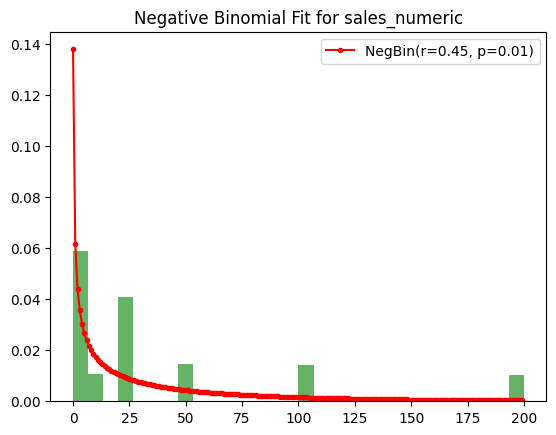

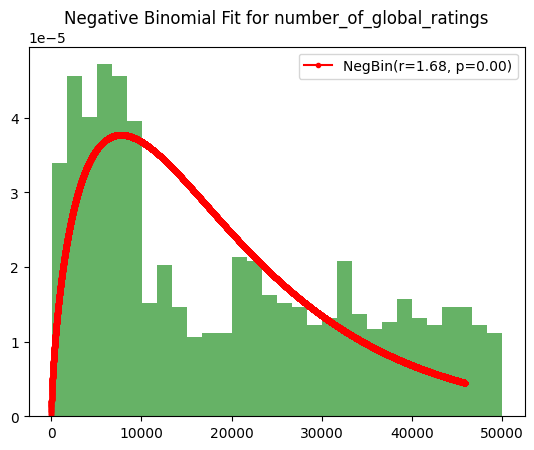

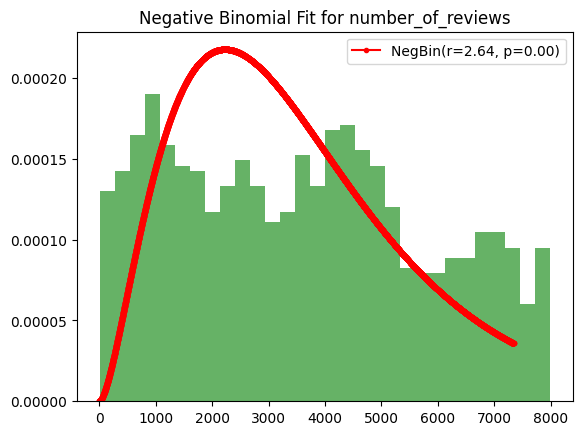

{'sales_numeric': {'mean': np.float64(35.71669477234401),
  'variance': 2857.8337347752945,
  'r': np.float64(0.45203025508093475),
  'p': np.float64(0.012497821107550312)},
 'number_of_global_ratings': {'mean': np.float64(19189.02107925801),
  'variance': 219832139.46582893,
  'r': np.float64(1.6751448412624832),
  'p': np.float64(8.728942513085437e-05)},
 'number_of_reviews': {'mean': np.float64(3589.1323777403036),
  'variance': 4890605.001869054,
  'r': np.float64(2.6359380793835303),
  'p': np.float64(0.0007338831036995703)}}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import nbinom

# Columns to check
count_cols = ["sales_numeric", "number_of_global_ratings", "number_of_reviews"]

results_nb = {}

for col in count_cols:
    data = df[col].dropna().astype(int)

    # Estimate parameters for Negative Binomial
    mean, var = np.mean(data), np.var(data)
    if var > mean:  # overdispersion condition
        p = mean / var
        r = mean * p / (1 - p)  # number of successes
    else:
        # fallback to Poisson if variance <= mean
        r, p = mean, 0.5

    # Histogram
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

    # Negative Binomial PMF
    x = np.arange(0, np.percentile(data, 95))  # cut off extreme outliers for plot
    pmf = nbinom.pmf(x, r, p)
    plt.plot(x, pmf, 'ro-', ms=3, label=f'NegBin(r={r:.2f}, p={p:.2f})')
    plt.title(f"Negative Binomial Fit for {col}")
    plt.legend()
    plt.show()

    results_nb[col] = {"mean": mean, "variance": var, "r": r, "p": p}

results_nb